In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data into a dataframe
data = pd.read_csv("cleaned_data.csv")
checkout = pd.read_csv('checkouts.csv')
data

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Year,Month,Day,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,index,Holiday_Name
0,25612325,2019-11-01 00:00:45,2019-11-01 00:08:10,Ellis Ave & 55th St,420.0,Harper Ave & 59th St,425.0,Subscriber,2019,11,1,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday
1,25612326,2019-11-01 00:01:13,2019-11-01 00:30:09,Western Ave & Winnebago Ave,116.0,Morgan St & Polk St,241.0,Customer,2019,11,1,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday
2,25612327,2019-11-01 00:01:42,2019-11-01 00:38:32,Western Ave & Winnebago Ave,116.0,May St & Taylor St,22.0,Subscriber,2019,11,1,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday
3,25612328,2019-11-01 00:02:24,2019-11-01 00:09:27,Lincoln Ave & Winona St,472.0,Maplewood Ave & Peterson Ave,455.0,Subscriber,2019,11,1,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday
4,25612329,2019-11-01 00:02:30,2019-11-01 00:04:09,Clinton St & Madison St,77.0,Clinton St & Washington Blvd,91.0,Subscriber,2019,11,1,0,26 F,81,8 mph,0 mph,0.0 in,Fair,103,Not Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384100,23638F49B7E7D116,2020-10-20 01:23:37,2020-10-20 01:39:30,Racine Ave & 35th St,367.0,Racine Ave & 18th St,15.0,member,2020,10,20,1,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday
3384101,3048BAC5F769B4DD,2020-10-20 01:20:30,2020-10-20 01:36:44,Wells St & Evergreen Ave,291.0,Wabash Ave & Roosevelt Rd,59.0,member,2020,10,20,1,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday
3384102,A4D50CAC9CCFB180,2020-10-20 01:51:54,2020-10-20 01:59:11,Kimbark Ave & 53rd St,322.0,Blackstone Ave & Hyde Park Blvd,121.0,member,2020,10,20,1,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday
3384103,2D551117FD01DCE1,2020-10-20 01:04:29,2020-10-20 01:19:33,Pine Grove Ave & Irving Park Rd,254.0,Glenwood Ave & Morse Ave,447.0,member,2020,10,20,1,44 F,79,8mph,0mph,0.0in,Cloudy,355,Not Holiday


In [4]:
# get info on the datasets
data.describe()

,start_station_id,end_station_id,Year,Month,Day,Hour,Humidity,index
count,3.384105e+06,3.384105e+06,3.384105e+06,3.384105e+06,3.384105e+06,3.384105e+06,3.384105e+06,3.384105e+06
mean,2.207295e+02,2.213160e+02,2.019902e+03,7.290561e+00,1.567697e+01,1.417160e+01,5.603544e+01,1.720365e+02
std,1.604914e+02,1.609034e+02,2.975318e-01,2.714568e+00,8.802159e+00,4.662227e+00,1.641885e+01,1.168382e+02
min,2.000000e+00,2.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00
25%,9.100000e+01,9.100000e+01,2.020000e+03,6.000000e+00,8.000000e+00,1.100000e+01,4.400000e+01,6.800000e+01
50%,1.920000e+02,1.920000e+02,2.020000e+03,8.000000e+00,1.600000e+01,1.500000e+01,5.400000e+01,1.330000e+02
75%,3.060000e+02,3.070000e+02,2.020000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.700000e+01,3.040000e+02
max,7.310000e+02,7.310000e+02,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,3.660000e+02


In [5]:
checkout.describe()

,start_station_id,Year,Month,Day,Hour,Humidity,Weekend,Checkouts
count,1.445491e+06,1.445491e+06,1.445491e+06,1.445491e+06,1.445491e+06,1.445491e+06,1.445491e+06,1.445491e+06
mean,2.476163e+02,2.019870e+03,7.009627e+00,1.582385e+01,1.349715e+01,6.114252e+01,2.729052e-01,2.588944e+00
std,1.713785e+02,3.361682e-01,3.109354e+00,8.733205e+00,5.113386e+00,1.814837e+01,4.454527e-01,2.974830e+00
min,2.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,1.000000e+00
25%,1.110000e+02,2.020000e+03,5.000000e+00,8.000000e+00,1.000000e+01,4.700000e+01,0.000000e+00,1.000000e+00
50%,2.230000e+02,2.020000e+03,7.000000e+00,1.600000e+01,1.400000e+01,6.000000e+01,0.000000e+00,2.000000e+00
75%,3.370000e+02,2.020000e+03,9.000000e+00,2.300000e+01,1.700000e+01,7.500000e+01,1.000000e+00,3.000000e+00
max,7.310000e+02,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.000000e+00,1.340000e+02


In [6]:
# Find which station the bikes are checked out more frequently
checkout['max_checkouts'] = checkout['start_station_name']
checkout['max_checkouts'].append(checkout['start_station_name'])
max_checkouts = checkout['max_checkouts'].max()
checkout['max_checkouts'].value_counts()

Clark St & Elm St            6490
Dearborn St & Erie St        6294
Wabash Ave & Grand Ave       6128
Columbus Dr & Randolph St    6105
Wells St & Concord Ln        6038
                             ... 
Western Ave & 111th St          5
Lawndale Ave & 111th St         4
Bradley Park                    3
Homewood Ave & 115th St         2
Western Ave & 104th St          1
Name: max_checkouts, Length: 686, dtype: int64

In [7]:
# get day of week using datetime 
data['started_at'] = pd.to_datetime(data['started_at'])
checkout['Date'] = pd.to_datetime(checkout.Date)
data['Day of Week'] = data['started_at'].dt.dayofweek
checkout['Day of Week'] = checkout['Date'].dt.dayofweek
checkout

,Date,start_station_name,start_station_id,Year,Month,Day,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts,max_checkouts,Day of Week
0,2019-11-01,63rd St Beach,101.0,2019,11,1,18,43 F,68,6 mph,0 mph,0.0 in,Cloudy,Not Holiday,0,1,63rd St Beach,4
1,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,37 F,86,13 mph,0 mph,0.0 in,Light Drizzle,Not Holiday,0,1,Milwaukee Ave & Wabansia Ave,4
2,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,38 F,83,10 mph,0 mph,0.0 in,Light Rain,Not Holiday,0,2,Milwaukee Ave & Wabansia Ave,4
3,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,23,27 F,81,7 mph,0 mph,0.0 in,Fair,Not Holiday,0,1,Milwaukee Ave & Wabansia Ave,4
4,2019-11-01,Monticello Ave & Irving Park Rd,484.0,2019,11,1,8,31 F,79,9 mph,0 mph,0.0 in,Mostly Cloudy,Not Holiday,0,1,Monticello Ave & Irving Park Rd,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445486,2020-10-31,Ellis Ave & 53rd St,418.0,2020,10,31,21,52 F,66,16mph,30mph,0.0in,Cloudy,Weekend,1,1,Ellis Ave & 53rd St,5
1445487,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,0,33 F,72,3mph,0mph,0.0in,Fair,Weekend,1,1,Ellis Ave & 55th St,5
1445488,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,3,33 F,66,7mph,0mph,0.0in,Fair,Weekend,1,1,Ellis Ave & 55th St,5
1445489,2020-10-31,Elizabeth (May) St & Fulton St,217.0,2020,10,31,15,59 F,38,18mph,26mph,0.0in,Fair,Weekend,1,1,Elizabeth (May) St & Fulton St,5


In [8]:
# convert month range to seasons
seasonal_data = []
months = list(set(data['Month']))
for month in months:
    if month in range(3, 6):
        seasonal_data.append("Spring")
    elif month in range(6, 9):
        seasonal_data.append("Summer")
    elif month in range(9, 12):
        seasonal_data.append("Fall")
    else:
        seasonal_data.append('Winter')
print(seasonal_data)

['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']


In [9]:
# create a column Seasons using the above
checkout['Seasons'] = checkout['Month'].replace(to_replace=months, value=seasonal_data)
checkout

,Date,start_station_name,start_station_id,Year,Month,Day,Hour,Temperature,Humidity,Wind Speed,Wind Gust,Precipitation,Condition,Holiday_Name,Weekend,Checkouts,max_checkouts,Day of Week,Seasons
0,2019-11-01,63rd St Beach,101.0,2019,11,1,18,43 F,68,6 mph,0 mph,0.0 in,Cloudy,Not Holiday,0,1,63rd St Beach,4,Fall
1,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,37 F,86,13 mph,0 mph,0.0 in,Light Drizzle,Not Holiday,0,1,Milwaukee Ave & Wabansia Ave,4,Fall
2,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,21,38 F,83,10 mph,0 mph,0.0 in,Light Rain,Not Holiday,0,2,Milwaukee Ave & Wabansia Ave,4,Fall
3,2019-11-01,Milwaukee Ave & Wabansia Ave,158.0,2019,11,1,23,27 F,81,7 mph,0 mph,0.0 in,Fair,Not Holiday,0,1,Milwaukee Ave & Wabansia Ave,4,Fall
4,2019-11-01,Monticello Ave & Irving Park Rd,484.0,2019,11,1,8,31 F,79,9 mph,0 mph,0.0 in,Mostly Cloudy,Not Holiday,0,1,Monticello Ave & Irving Park Rd,4,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445486,2020-10-31,Ellis Ave & 53rd St,418.0,2020,10,31,21,52 F,66,16mph,30mph,0.0in,Cloudy,Weekend,1,1,Ellis Ave & 53rd St,5,Fall
1445487,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,0,33 F,72,3mph,0mph,0.0in,Fair,Weekend,1,1,Ellis Ave & 55th St,5,Fall
1445488,2020-10-31,Ellis Ave & 55th St,420.0,2020,10,31,3,33 F,66,7mph,0mph,0.0in,Fair,Weekend,1,1,Ellis Ave & 55th St,5,Fall
1445489,2020-10-31,Elizabeth (May) St & Fulton St,217.0,2020,10,31,15,59 F,38,18mph,26mph,0.0in,Fair,Weekend,1,1,Elizabeth (May) St & Fulton St,5,Fall


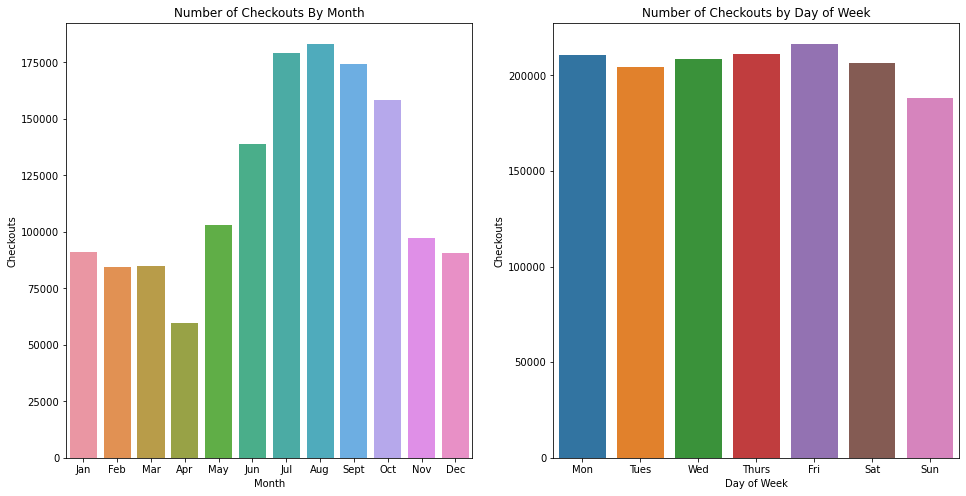

In [10]:
# Plot the no of checkouts by the month and day of the week
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.countplot(x='Month', data=checkout, ax=ax[0])
ax[0].set_title("Number of Checkouts By Month")
ax[0].set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))
ax[0].set_ylabel('Checkouts')
sns.countplot(x='Day of Week', data=checkout, ax=ax[1])
ax[1].set_title("Number of Checkouts by Day of Week")
ax[1].set_xticklabels(('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
ax[1].set_ylabel("Checkouts")
plt.savefig('checkouts_month_day.jpg')
plt.show()

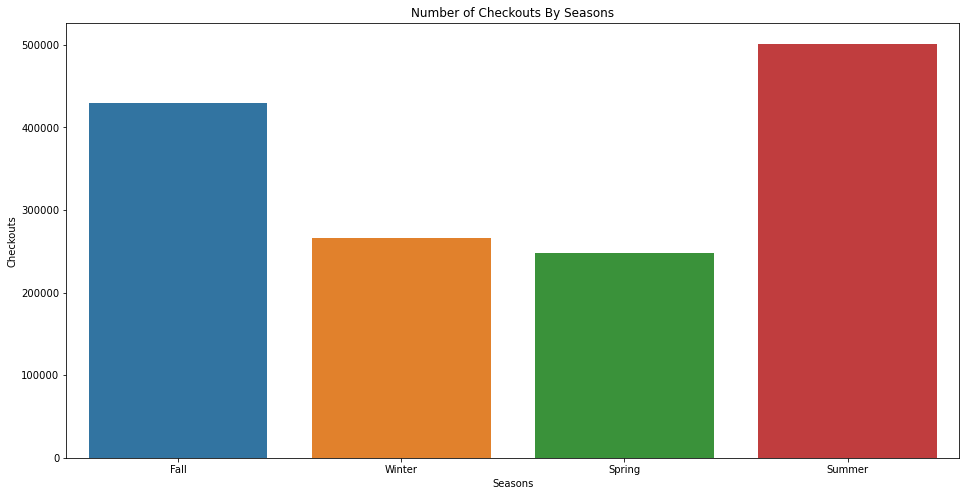

In [11]:
# Plot number of checkouts by the seasons
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
sns.countplot(x='Seasons', data=checkout)
ax.set_title("Number of Checkouts By Seasons")
# ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))
ax.set_ylabel('Checkouts')
plt.savefig('checkouts_seasonal.jpg')
plt.show()

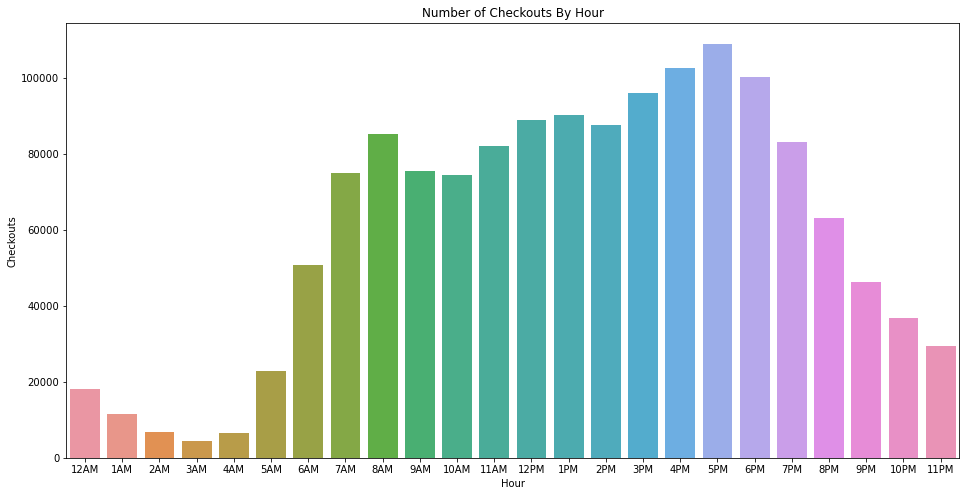

In [12]:
# Plot number of checkouts by Hour of the day
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
sns.countplot(x='Hour', data=checkout)
ax.set_title("Number of Checkouts By Hour")
ax.set_xticklabels(('12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'))
ax.set_ylabel('Checkouts')
plt.savefig('checkouts_hour.jpg')
plt.show()

In [13]:
# convert holiday names to numeric (0 - 3)
holiday_names = list(set(data['Holiday_Name']))
print(holiday_names)
values = [1 if hol != "Not Holiday" else 0 for hol in holiday_names]
values

["New Year's Day", 'Veterans Day', 'Memorial Day', 'Columbus Day', 'Thanksgiving Day', 'Not Holiday', 'Weekend', 'Independence Day', 'Spring Break', 'Summer Vacation', 'Christmas', 'Winter Vacation', 'Labor Day', "Washington's Birthday", 'Birthday of Martin Luther King, Jr.']


[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [14]:
holiday_names1 = list(set(data['Holiday_Name']))
print(holiday_names1)
values1 = []
for hol in holiday_names1:
    if hol == 'Not Holiday':
        values1.append(0)
    elif hol == 'Spring Break' or hol == 'Summer Vacation' or hol == 'Winter Vacation':
        values1.append(1)
    elif hol == 'Weekend':
        values1.append(2)
    else:
        values1.append(3)
values1

["New Year's Day", 'Veterans Day', 'Memorial Day', 'Columbus Day', 'Thanksgiving Day', 'Not Holiday', 'Weekend', 'Independence Day', 'Spring Break', 'Summer Vacation', 'Christmas', 'Winter Vacation', 'Labor Day', "Washington's Birthday", 'Birthday of Martin Luther King, Jr.']


[3, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 1, 3, 3, 3]

In [15]:
data['Holiday'] = data['Holiday_Name'].replace(to_replace=holiday_names, value=values)
checkout['Holiday'] = checkout['Holiday_Name'].replace(to_replace=holiday_names, value=values)

In [16]:
data['Breaks'] = data['Holiday_Name'].replace(to_replace=holiday_names1, value=values1)
checkout['Breaks'] = checkout['Holiday_Name'].replace(to_replace=holiday_names1, value=values1)

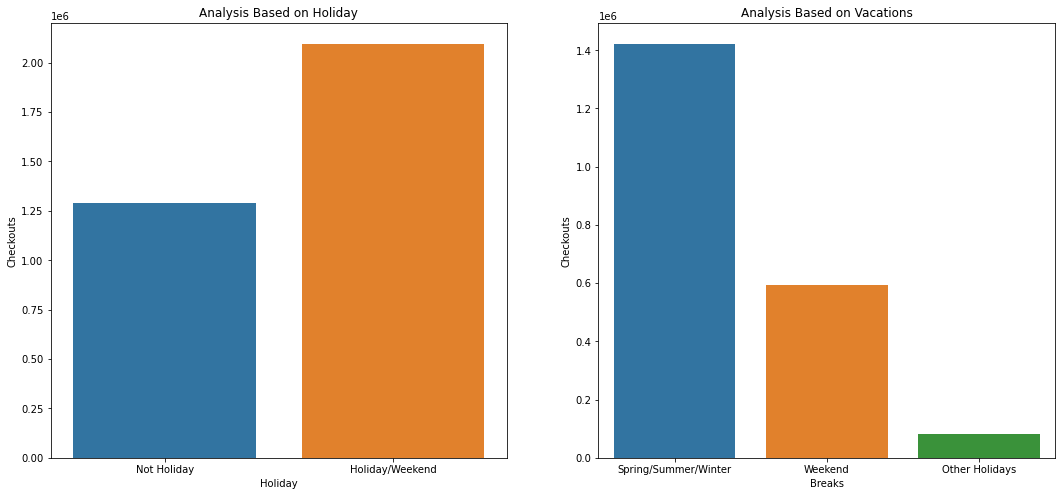

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
sns.countplot(x='Holiday', data=data, ax=ax[0])
ax[0].set_title("Analysis Based on Holiday")
ax[0].set_xticklabels(('Not Holiday', 'Holiday/Weekend'))
ax[0].set_ylabel('Checkouts')
break_data = data[data['Breaks'] != 0]
sns.countplot(x='Breaks', data=break_data, ax=ax[1])
ax[1].set_title("Analysis Based on Vacations")
ax[1].set_xticklabels(('Spring/Summer/Winter', 'Weekend', 'Other Holidays'))
ax[1].set_ylabel('Checkouts')
plt.savefig('checkout_holiday.jpg')
plt.show()

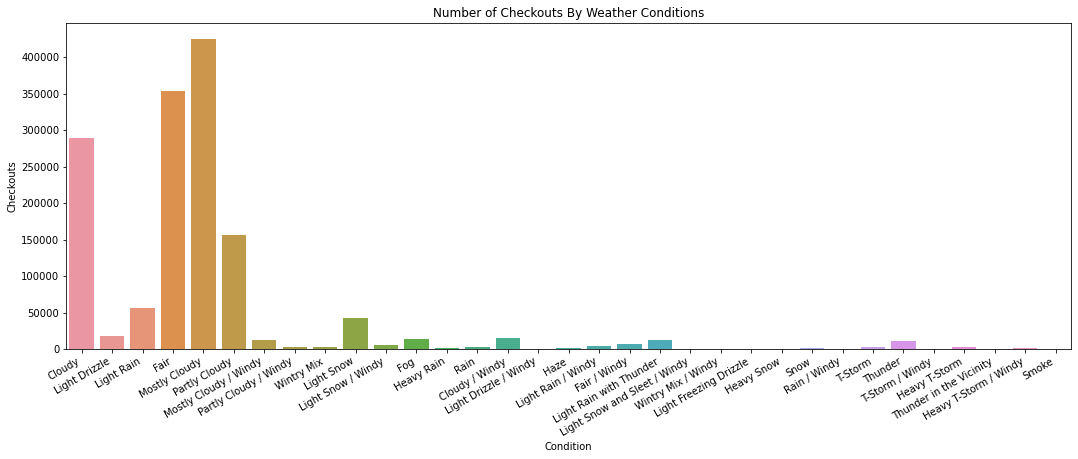

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))
sns.countplot(x='Condition', data=checkout, ax=ax)
ax.set_title("Number of Checkouts By Weather Conditions")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel('Checkouts')
plt.savefig('checkout_weather.jpg')
plt.show()